# CS3315 Project Unsupervised Learning

* Train two models: K-means and isolation forest
* K-means would require additional data analysis/interpretation (i.e. what additional insights does clustering provide outside of the labels?)
*Isolation forest - interpolate some kind of "badness" score from the features? (i.e. discovery of new label)]

Code framework from https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### Isolation Forest

In [2]:
# import data to dataframe

filename = '/content/2020.06.19.csv'
df = pd.read_csv(filename)
#df.set_index('avg_ipt',inplace=True)
# df.info()
# df.head(4)

In [3]:
df.dropna(inplace=True)
df.isna().sum()

avg_ipt          0
bytes_in         0
bytes_out        0
dest_ip          0
dest_port        0
entropy          0
num_pkts_out     0
num_pkts_in      0
proto            0
src_ip           0
src_port         0
time_end         0
time_start       0
total_entropy    0
label            0
duration         0
dtype: int64

In [4]:
print('label values:', df['label'].unique())

def ordinal_encoder(category):
    dict = {'benign':0, 'outlier':1, 'malicious':2}
    return dict[category]

print('benign', ordinal_encoder('benign'))
print('outlier', ordinal_encoder('outlier'))
print('malicious', ordinal_encoder('malicious'))
df['label'] = df['label'].apply(ordinal_encoder)

label values: ['benign' 'outlier' 'malicious']
benign 0
outlier 1
malicious 2


In [5]:
features = ['dest_ip', 
            'label']

X = df.loc[:, features]
y = df.loc[:,'label']

In [6]:
features_src = ['src_ip', 
                'label']

X_src = df.loc[:, features_src]
y = df.loc[:,'label']

In [7]:
# Scale features for Destination IP
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

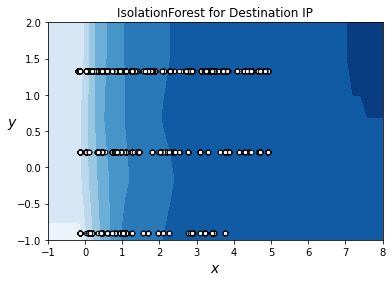

In [12]:
# Perform Isolation Forest for Destination IP
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-2, 8, 50), np.linspace(-1, 40, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest for Destination IP")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X[:, 0], X[:, 1], c="white", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-1, 8))
plt.ylim((-1, 2))
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.show()

In [9]:
# Scale features for Source IP
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_src)
X_src = scaler.transform(X_src)

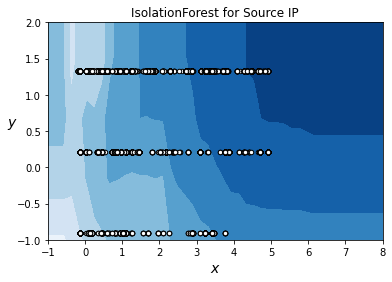

In [11]:
# Perform Isolation Forest for Source IP

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_src)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-2, 8, 50), np.linspace(-1, 40, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest for Source IP")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X[:, 0], X[:, 1], c="white", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-1, 8))
plt.ylim((-1, 2))
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.show()